In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline



In [2]:
# The code was removed by Watson Studio for sharing.

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [3]:

body = client_51ac9752a63648d2959e66f034dfa6f3.get_object(Bucket='desafio1-donotdelete-pr-kz3ec0aucx4ash',Key='DEMOGRAPHICS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0


In [4]:

body = client_51ac9752a63648d2959e66f034dfa6f3.get_object(Bucket='desafio1-donotdelete-pr-kz3ec0aucx4ash',Key='ACCOUNTS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3999 non-null   int64  
 1   PAYMENT_TERM         3975 non-null   float64
 2   INSTALLMENT_PLANS    3978 non-null   object 
 3   INSTALLMENT_PERCENT  3974 non-null   float64
 4   LOAN_PURPOSE         3979 non-null   object 
 5   LOAN_AMOUNT          3981 non-null   float64
 6   OTHERS_ON_LOAN       3977 non-null   object 
 7   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 250.1+ KB


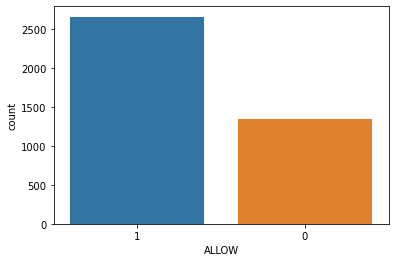

In [5]:
loans = df_data_1
loans.info()
loans.describe()
risk_plot = sns.countplot(data=loans, x='ALLOW', order=loans['ALLOW'].value_counts().index)
plt.show()

In [6]:
demographics = df_data_2
demographics.info()
demographics.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3936 non-null   int64  
 1   SEX                         3920 non-null   object 
 2   AGE                         3918 non-null   float64
 3   JOB_TYPE                    3910 non-null   float64
 4   DEPENDENTS                  3915 non-null   float64
 5   TELEPHONE                   3915 non-null   float64
 6   FOREIGN_WORKER              3909 non-null   float64
 7   EMPLOYMENT_DURATION         3923 non-null   float64
 8   PROPERTY                    3918 non-null   object 
 9   HOUSING                     3912 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  3917 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 338.4+ KB


,ID,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION
count,3.936000e+03,3918.000000,3910.000000,3915.000000,3915.000000,3909.000000,3923.000000,3917.000000
mean,6.614226e+05,36.032925,2.429923,1.161175,0.412005,0.975697,4.238848,2.865458
std,3.731249e+05,10.617743,0.931842,0.367739,0.492259,0.154008,3.595680,1.115873
min,9.800000e+01,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.427448e+05,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,6.679115e+05,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000
75%,9.794970e+05,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000
max,1.320082e+06,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000


In [7]:
accounts = df_data_3
accounts.info()
accounts.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2477 non-null   int64  
 1   CHECKING_BALANCE        2467 non-null   object 
 2   CREDIT_HISTORY          2462 non-null   object 
 3   EXISTING_SAVINGS        2467 non-null   object 
 4   EXISTING_CREDITS_COUNT  2463 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.9+ KB


,ID,EXISTING_CREDITS_COUNT
count,2.477000e+03,2463.000000
mean,6.683799e+05,1.469752
std,3.730570e+05,0.569142
min,9.800000e+01,1.000000
25%,3.521920e+05,1.000000
50%,6.809460e+05,1.000000
75%,9.857560e+05,2.000000
max,1.319964e+06,3.000000


In [8]:
clean_df = loans.dropna()
INSTALLMENT_PLANS_CAT=pd.get_dummies(clean_df['INSTALLMENT_PLANS'])
LOAN_PURPOSE_CAT=pd.get_dummies(clean_df['LOAN_PURPOSE'])
OTHERS_ON_LOAN_CAT=pd.get_dummies(clean_df['OTHERS_ON_LOAN'])
clean_df.head()
clean_df =pd.concat((clean_df,OTHERS_ON_LOAN_CAT,LOAN_PURPOSE_CAT,INSTALLMENT_PLANS_CAT), axis=1)
loans_clean_df=clean_df.drop(['INSTALLMENT_PLANS','LOAN_PURPOSE','OTHERS_ON_LOAN'], axis=1)
loans_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3870 entries, 0 to 3998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3870 non-null   int64  
 1   PAYMENT_TERM         3870 non-null   float64
 2   INSTALLMENT_PERCENT  3870 non-null   float64
 3   LOAN_AMOUNT          3870 non-null   float64
 4   ALLOW                3870 non-null   int64  
 5   CO-APPLICANT         3870 non-null   uint8  
 6   GUARANTOR            3870 non-null   uint8  
 7   NONE                 3870 non-null   uint8  
 8   APPLIANCES           3870 non-null   uint8  
 9   BUSINESS             3870 non-null   uint8  
 10  CAR_NEW              3870 non-null   uint8  
 11  CAR_USED             3870 non-null   uint8  
 12  EDUCATION            3870 non-null   uint8  
 13  FURNITURE            3870 non-null   uint8  
 14  OTHER                3870 non-null   uint8  
 15  RADIO_TV             3870 non-null   u

In [9]:
clean_df2 = demographics.dropna()
SEX=pd.get_dummies(clean_df2['SEX'])
PROPERTY_CAT=pd.get_dummies(clean_df2['PROPERTY'])
HOUSING_CAT=pd.get_dummies(clean_df2['HOUSING'])
clean_df2 =pd.concat((clean_df2,SEX,PROPERTY_CAT,HOUSING_CAT), axis=1)
demographics_clean_df=clean_df2.drop(['PROPERTY','HOUSING','SEX'], axis=1)
demographics_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3736 entries, 0 to 3935
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3736 non-null   int64  
 1   AGE                         3736 non-null   float64
 2   JOB_TYPE                    3736 non-null   float64
 3   DEPENDENTS                  3736 non-null   float64
 4   TELEPHONE                   3736 non-null   float64
 5   FOREIGN_WORKER              3736 non-null   float64
 6   EMPLOYMENT_DURATION         3736 non-null   float64
 7   CURRENT_RESIDENCE_DURATION  3736 non-null   float64
 8   F                           3736 non-null   uint8  
 9   M                           3736 non-null   uint8  
 10  CAR_OTHER                   3736 non-null   uint8  
 11  REAL_ESTATE                 3736 non-null   uint8  
 12  SAVINGS_INSURANCE           3736 non-null   uint8  
 13  UNKNOWN                     3736 

In [10]:
clean_df3 = accounts.dropna()
clean_df3 = clean_df3.drop(clean_df3[clean_df3['EXISTING_SAVINGS']=='UNKNOWN'].index)
clean_df3['CHECKING_BALANCE']= clean_df3['CHECKING_BALANCE'].replace('NO_CHECKING','0')
clean_df3['CHECKING_BALANCE'] = pd.to_numeric(clean_df3['CHECKING_BALANCE'],errors = 'coerce')
clean_df3['EXISTING_SAVINGS'] = pd.to_numeric(clean_df3['EXISTING_SAVINGS'],errors = 'coerce')
CREDIT_HISTORY_CAT=pd.get_dummies(clean_df3['CREDIT_HISTORY'])
clean_df3 =pd.concat((clean_df3,CREDIT_HISTORY_CAT), axis=1)
accounts_clean_df=clean_df3.drop(['CREDIT_HISTORY'], axis=1)
accounts_clean_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2255 entries, 0 to 2474
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2255 non-null   int64  
 1   CHECKING_BALANCE        2255 non-null   float64
 2   EXISTING_SAVINGS        2255 non-null   float64
 3   EXISTING_CREDITS_COUNT  2255 non-null   float64
 4   ALL_CREDITS_PAID_BACK   2255 non-null   uint8  
 5   CREDITS_PAID_TO_DATE    2255 non-null   uint8  
 6   NO_CREDITS              2255 non-null   uint8  
 7   OUTSTANDING_CREDIT      2255 non-null   uint8  
 8   PRIOR_PAYMENTS_DELAYED  2255 non-null   uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 99.1 KB


In [11]:
merged_inner = pd.merge(left=loans_clean_df,right=demographics_clean_df, left_on='ID', right_on='ID')
merged_inner = pd.merge(left=merged_inner,right=accounts_clean_df, left_on='ID', right_on='ID')
merged_inner.info()
merged_inner.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2075 non-null   int64  
 1   PAYMENT_TERM                2075 non-null   float64
 2   INSTALLMENT_PERCENT         2075 non-null   float64
 3   LOAN_AMOUNT                 2075 non-null   float64
 4   ALLOW                       2075 non-null   int64  
 5   CO-APPLICANT                2075 non-null   uint8  
 6   GUARANTOR                   2075 non-null   uint8  
 7   NONE                        2075 non-null   uint8  
 8   APPLIANCES                  2075 non-null   uint8  
 9   BUSINESS                    2075 non-null   uint8  
 10  CAR_NEW                     2075 non-null   uint8  
 11  CAR_USED                    2075 non-null   uint8  
 12  EDUCATION                   2075 non-null   uint8  
 13  FURNITURE                   2075 

Index(['ID', 'PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'LOAN_AMOUNT', 'ALLOW',
       'CO-APPLICANT', 'GUARANTOR', 'NONE', 'APPLIANCES', 'BUSINESS',
       'CAR_NEW', 'CAR_USED', 'EDUCATION', 'FURNITURE', 'OTHER', 'RADIO_TV',
       'REPAIRS', 'RETRAINING', 'VACATION', 'BANK', 'NONE', 'STORES', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'CURRENT_RESIDENCE_DURATION', 'F', 'M',
       'CAR_OTHER', 'REAL_ESTATE', 'SAVINGS_INSURANCE', 'UNKNOWN', 'FREE',
       'OWN', 'RENT', 'CHECKING_BALANCE', 'EXISTING_SAVINGS',
       'EXISTING_CREDITS_COUNT', 'ALL_CREDITS_PAID_BACK',
       'CREDITS_PAID_TO_DATE', 'NO_CREDITS', 'OUTSTANDING_CREDIT',
       'PRIOR_PAYMENTS_DELAYED'],
      dtype='object')

In [12]:
merged_inner.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,CO-APPLICANT,GUARANTOR,NONE,APPLIANCES,BUSINESS,...,OWN,RENT,CHECKING_BALANCE,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,ALL_CREDITS_PAID_BACK,CREDITS_PAID_TO_DATE,NO_CREDITS,OUTSTANDING_CREDIT,PRIOR_PAYMENTS_DELAYED
count,2.075000e+03,2075.000000,2075.000000,2075.00000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,...,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000
mean,6.700669e+05,632.766265,2.923855,3345.61494,0.675181,0.132530,0.021687,0.845783,0.107952,0.028434,...,0.642410,0.220241,316.353055,1349.751687,1.420241,0.162892,0.315181,0.026506,0.160482,0.334940
std,3.740689e+05,331.532267,1.098339,2468.81518,0.468420,0.339148,0.145694,0.361244,0.310394,0.166249,...,0.479406,0.414509,2225.861346,4759.334646,0.543015,0.369356,0.464700,0.160673,0.367141,0.472083
min,9.800000e+01,120.000000,1.000000,250.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2797.250000,0.020000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.511160e+05,372.000000,2.000000,1237.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,-61.955000,63.870000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.868660e+05,620.000000,3.000000,3030.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,262.920000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.863705e+05,869.000000,4.000000,5067.50000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,44.975000,727.300000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.319964e+06,1643.000000,6.000000,11676.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,28041.160000,50177.310000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='ALLOW', ylabel='Count'>

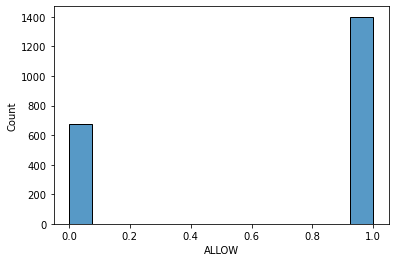

In [13]:
sns.histplot(merged_inner['ALLOW'])

In [14]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    merged_inner[['PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'LOAN_AMOUNT', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE', 'EXISTING_SAVINGS',
       'EXISTING_CREDITS_COUNT']].values
    )
covariance_matrix = np.cov(scaled.T)
covariance_matrix

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)
    
print(variance_explained)

[37.207491642654226, 1.759620352126633, 2.2998488043953573, 8.223155385629717, 7.881526588530023, 7.594157730925723, 7.2526671834230045, 6.556158119250105, 3.1714192302343243, 3.5477576679949996, 5.202976114857139, 4.768544603590124, 4.534676576388617]


In [15]:
y = merged_inner['ALLOW']
X = merged_inner[['PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'LOAN_AMOUNT',
       'CO-APPLICANT', 'GUARANTOR', 'NONE', 'APPLIANCES', 'BUSINESS',
       'CAR_NEW', 'CAR_USED', 'EDUCATION', 'FURNITURE', 'OTHER', 'RADIO_TV',
       'REPAIRS', 'RETRAINING', 'VACATION', 'BANK', 'NONE', 'STORES', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'CURRENT_RESIDENCE_DURATION', 'F', 'M',
       'CAR_OTHER', 'REAL_ESTATE', 'SAVINGS_INSURANCE', 'UNKNOWN', 'FREE',
       'OWN', 'RENT', 'CHECKING_BALANCE', 'EXISTING_SAVINGS',
       'EXISTING_CREDITS_COUNT', 'ALL_CREDITS_PAID_BACK',
       'CREDITS_PAID_TO_DATE', 'NO_CREDITS', 'OUTSTANDING_CREDIT',
       'PRIOR_PAYMENTS_DELAYED']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
arbol = DecisionTreeClassifier()
arbol.fit(X_train,y_train)
arbol.predict(X_test)
y_pred = arbol.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo (número de predicciones asertadas sobre el número total de pruebas): {acc}")
print(arbol.score(X_test, y_test))

Exactitud del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.727710843373494
0.727710843373494


In [16]:
# Instalar la biblioteca WML
!pip install -U ibm-watson-machine-learning

In [17]:
from ibm_watson_machine_learning import APIClient

In [18]:
api_key = ''
location = 'us-south' # En caso de WML estar en una región diferente, altere esta linea

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

client = APIClient(wml_credentials)

In [19]:
# Lista espacios creados en su instancia de WML
client.spaces.list(limit=10)

------------------------------------  --------  ------------------------
ID                                    NAME      CREATED
a3f67111-4122-4120-b047-156774869978  desafio1  2021-11-17T14:01:46.256Z
------------------------------------  --------  ------------------------


In [20]:
space_id = 'a3f67111-4122-4120-b047-156774869978'
client.set.default_space(space_id)

'SUCCESS'

In [21]:
client.spaces.list(limit=10)

------------------------------------  --------  ------------------------
ID                                    NAME      CREATED
a3f67111-4122-4120-b047-156774869978  desafio1  2021-11-17T14:01:46.256Z
------------------------------------  --------  ------------------------


In [22]:
base_sw_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
